In [20]:
import modules.helper_func_class as misc
import modules.plot_func as pltt
import matplotlib.pyplot as plt
import numpy as np
import networkx
import random


# gerando posicioes aleatorias
r = 2*np.random.random((1000,2))-1
r[:,0] = r[:,0]*1
r[:,1] = r[:,1]*5

In [21]:
def Tamanho_da_Caminhada(L):
    """
    cria lista de vizinhos e probabilidade de dar um passo pra cada vizinho
    """
    pstep = 0.25

    G = networkx.grid_graph((L,L),periodic=False)

    A = networkx.adjacency_matrix(G)

    vizinhos = []
    stepprob = []
    for k in range(L*L):
        vizinhos.append(np.nonzero(A[:,[k]].todense().flatten())[0])
        pstep_vizinhos = pstep * np.ones(vizinhos[-1].size)
        stepprob.append(pstep_vizinhos/np.sum(pstep_vizinhos))

    #print(vizinhos)
    #print(stepprob)
    return vizinhos,stepprob

def start_point(L):
    if (L%2==0):
        start_position = (L*(L-1)/2)-1 #define o ponto inicial no quadrado superior do centro do lattice
        return int(start_position)
    else:
        start_position = (L*L-1)/2 #define o ponto inicial no quadrado central
    return int(start_position)

def passo_na_caminhada(vizinhos,stepprob):
    """
    decide o sitio vizinho pra dar um passo
    """
    s_p  = stepprob
    k    = 0
    r    = random.random()
    p0   = 0.0
    p1   = s_p[0]
    for k in range(len(s_p)):
        p1 = p0 + s_p[k]
        if (r >= p0) and (r < p1):
            return vizinhos[k]
        p0 = p1
    return vizinhos[k]

In [22]:
def Caminhada_Aleatoria_2D(L, T):
    """
    realiza uma caminhada aleatoria em um lattice 2D quadrado
    L -> tamanho lateral do lattice
    T -> tempo total (nro de passos de tempo) para caminhar

    returns
        pos_list -> lista de posicoes (indice linear)
    """
    vizinhos , stepprob = Tamanho_da_Caminhada(L)

    current_position = start_point(L)
    pos_list         = [start_point(L)]

    for _ in range(T):
        current_position = passo_na_caminhada(vizinhos[current_position],stepprob[current_position])
        pos_list.append(current_position)

    return pos_list

In [23]:
L = 21
pos_list = Caminhada_Aleatoria_2D(L, 10000)

pos_list = np.array(pos_list)

y,x = np.unravel_index(pos_list,(L,L))

In [28]:
def Caminhada_Aleatoria_2D_de_max_T(L,N,T_values):
    T_max    = np.max(T_values)
    T_values = np.array(T_values).flatten()

    x_list = [None for _ in range(N)]
    y_list = [None for _ in range(N)]
    for k in range(N):
        position_list = Caminhada_Aleatoria_2D(L,T_max)
        y,x = np.unravel_index(position_list,(L,L))
        x_list[k] = x[T_values]
        y_list[k] = y[T_values]

    return np.array(x_list),np.array(y_list)



In [76]:
T_values = [5,10,500,1000] # lista organizada e em ordem crescente
N        = 5 # Número de passos em cada caminhada
L        = 11 # Dimenções de Lattice
lista_x,lista_y = Caminhada_Aleatoria_2D_de_max_T(L,N,T_values)

print(lista_x)

[[ 4  5 10  7]
 [ 4  2  5  8]
 [ 3  5  7  8]
 [ 7  6  2  1]
 [ 5  4 10 10]]


In [ ]:
r_T_5    = []
r_T_10   = []
r_T_500  = []
r_T_1000 = []



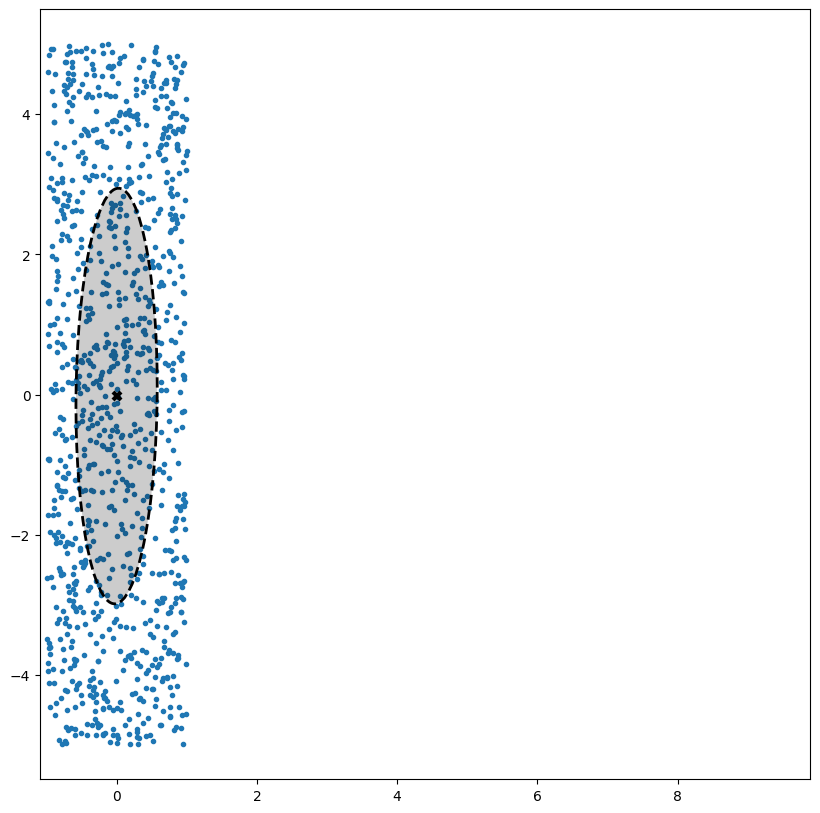

In [8]:
r_mean, r_cov, r_dispersion, r_eigdir = misc.calc_dispersion(r) #exemple

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

pltt.plot_trajectory_points(r,ax=ax,use_scatter=False,linestyle='none',marker='.')
pltt.plot_dispersion(r_mean,r_eigdir,r_dispersion,ax=ax,zorder=1000,facecolor=np.array((0,0,0,0.2)))
plt.axis('square')
plt.show()

In [24]:
r_mean, r_cov, r_dispersion, r_eigdir = misc.calc_dispersion()

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

pltt.plot_trajectory_points(r,ax=ax,use_scatter=False,linestyle='none',marker='.')
pltt.plot_dispersion(r_mean,r_eigdir,r_dispersion,ax=ax,zorder=1000,facecolor=np.array((0,0,0,0.2)))
plt.axis('square')
plt.show()

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional